In [1]:
%pylab inline

from PIL import Image
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
im = Image.open('annulusmask.tif')
imarray = np.array(im)

In [3]:
x_obs_positions = np.arange(320)
y_obs_positions = np.arange(240)

dx = abs(x_obs_positions[1]-x_obs_positions[0])
dy = abs(y_obs_positions[1]-y_obs_positions[0])

N = len(x_obs_positions)
M = len(y_obs_positions)

coords = [[ [x,y] for x in x_obs_positions] for y in y_obs_positions] 
coords = np.array([item for sublist in coords for item in sublist])
distances = ((coords[:,0]-N/2)**2 + (coords[:,1]-M/2)**2)**0.5
angles = np.arctan2(coords[:,1]-N/2,coords[:,0]-M/2)

a = 45
b = 50 # stress support
c = 15 # cell boundary


In [4]:
CUTOFF  = 20

fr = 1e-4
ftheta = 1e-4

m = 3
n = 4

condition_outside = (imarray.reshape((320*240,)) != 0 ) * (distances <= b + CUTOFF)
condition_inside = imarray.reshape((320*240,)) == 0

stress_r = 0 + (distances>=a) * (distances<=b) * fr * np.sin(m*angles)
stress_theta = 0 + (distances>=a) * (distances<=b) * ftheta * np.cos(n*angles)

stress_x = stress_r*cos(angles) -stress_theta*sin(angles)
stress_y = stress_r*sin(angles) + stress_theta*cos(angles)

s_x = stress_x[condition_inside]
s_y = stress_y[condition_inside]

# build the stress field

x_out = np.array(coords[condition_outside,0]/dx,dtype=int)
y_out = np.array(coords[condition_outside,1]/dy,dtype=int)

x_in = np.array(coords[condition_inside,0]/dx,dtype=int)
y_in = np.array(coords[condition_inside,1]/dy,dtype=int)



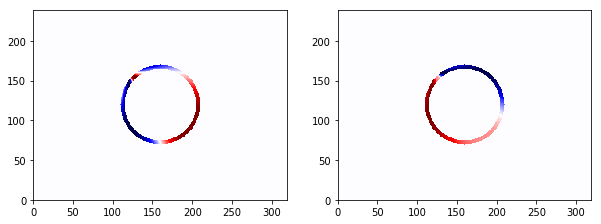

In [5]:
fig = plt.figure(figsize=(10,6))

plt.subplot(121)
plt.pcolormesh(x_obs_positions,y_obs_positions,imarray==0,
                           cmap='seismic_r',vmax = 1e-4, vmin=-1e-4).axes.set_aspect('equal')
plt.pcolormesh(x_obs_positions,y_obs_positions,stress_x.reshape((M,N)),
                           cmap='seismic_r',vmax = 1e-4, vmin=-1e-4).axes.set_aspect('equal')
plt.subplot(122)
plt.pcolormesh(x_obs_positions,y_obs_positions,stress_y.reshape((M,N)),
                           cmap='seismic_r',vmax = 1e-4, vmin=-1e-4).axes.set_aspect('equal')

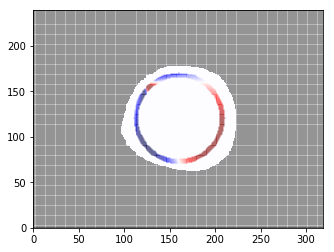

In [6]:
plt.pcolormesh(x_obs_positions,y_obs_positions,imarray==0,
                           cmap='gray').axes.set_aspect('equal')

plt.pcolormesh(x_obs_positions,y_obs_positions,stress_x.reshape((M,N)),
                           cmap='seismic_r',vmax = 1e-4, vmin=-1e-4, alpha = 0.2).axes.set_aspect('equal')

In [7]:
imarray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)